## Assignment 4

In [18]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### 1. Implementation of PCA

In [19]:
training_data = np.array(pd.read_csv('zip.train', sep=' ', header=None))
x_train, y_train = training_data[:,1:-1], training_data[:,0]
print(x_train.shape)

(7291, 256)


In [20]:
class PCA:
    def __init__(self, dimension):
        self.d = dimension
        self.transformed_data = None
    
    def fit(self, data):
        mean = np.mean(data, axis=0) #mean of data
        C = data - mean #center data
        standard_deviation = np.std(C, axis=0)
        x = C/standard_deviation #standardized data
        cov = np.cov(x.T) #cvariance matrix
        eig_values, eig_vectors = np.linalg.eig(cov)

        pc = eig_vectors.T[0:self.d]
        self.transformed_data = np.dot(x, pc.T)
        return self.transformed_data
    
    def plot(self, lables):
        fig = plt.figure(figsize=(10, 10))
        for i in range(10):
            plt.scatter(*self.transformed_data[lables == i].T, s=3, label=str(i))
        plt.legend()
        plt.show()

In [21]:
pc_2 = PCA(dimension=2)
transformed_data = pc_2.fit(x_train)

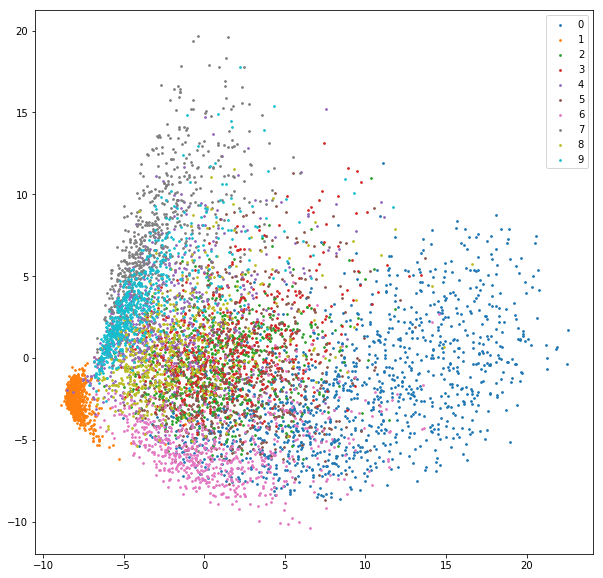

In [22]:
pc_2.plot(y_train)

#### Least Squares classifiers on the two- dimensional dataset:

In [23]:
test_data = np.array(pd.read_csv('zip.test', sep =' ',header=None))
x_test, y_test = test_data[:,1:], test_data[:,0]

In [24]:
class LeastSquaresClassifier:
    def __init__(self):
        self.b = None
        self.prediction = None
        
    def __labels_to_one_hot(self, labels):
        onehot_encoded = []
        for label in labels:
            vector = np.zeros(10)
            vector[int(label)] = 1
            onehot_encoded.append(vector)
        return np.array(onehot_encoded)
    
    def __estimate_b(self, X, y):
        invXtX = np.linalg.inv(np.dot(X.T, X))
        return np.dot(np.dot(invXtX, X.T), y)
    
    def fit(self, x_train, y_train):
        y_train_vec = self.__labels_to_one_hot(y_train)
        self.b = self.__estimate_b(x_train, y_train_vec)
        return self.b
    
    def predict(self, x_test, b):
        y_hat = np.dot(x_test, self.b)
        self.prediction = y_hat.argmax(axis=1)
        return self.prediction
    
    def accuracy(self, y_test):
        return np.mean(y_test == self.prediction)

In [25]:
ls = LeastSquaresClassifier()
b = ls.fit(x_train, y_train)
ls.predict(x_test, b)
print(ls.accuracy(y_test))

0.8699551569506726


In [26]:
pc_2_test = PCA(dimension=2)
transformed_test = pc_2_test.fit(x_test)

In [27]:
ls_2 = LeastSquaresClassifier()
b_2 = ls_2.fit(transformed_data, y_train)
ls_2.predict(transformed_test, b_2)
print(ls_2.accuracy(y_test))

0.35575485799701045


###  2. Eigenfaces

In [28]:
from sklearn.decomposition import PCA
import os

In [29]:
dir='lfwcrop_grey/faces'
photos=os.listdir(dir)[0:1000]
images=[dir+'/' + photo for photo in photos]
faces=np.array([plt.imread(image) for image in images], dtype=np.float64)
n_samples, h, w = faces.shape

(64, 64)


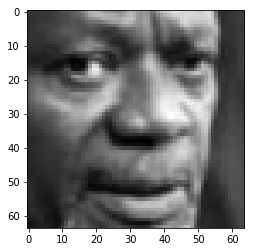

In [30]:
img_1 = faces[0]
print(faces[0].shape)
plt.imshow(img_1, cmap='gray')
plt.show()

In [31]:
X = faces.reshape(n_samples, h*w)
pca_eig = PCA(50)
transformed_X = pca_eig.fit(X)

In [32]:
def plot_portraits(images, titles, h, w, n_row, n_col):
    plt.figure(figsize=(2.2 * n_col, 2.2 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i])
        plt.xticks(())
        plt.yticks(())
    plt.show()

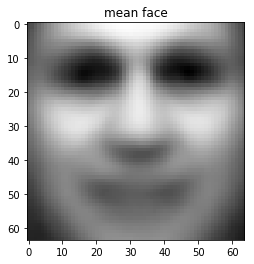

In [33]:
plt.imshow(pca_eig.mean_.reshape((h, w)), cmap=plt.cm.gray)
plt.title('mean face')
plt.show()

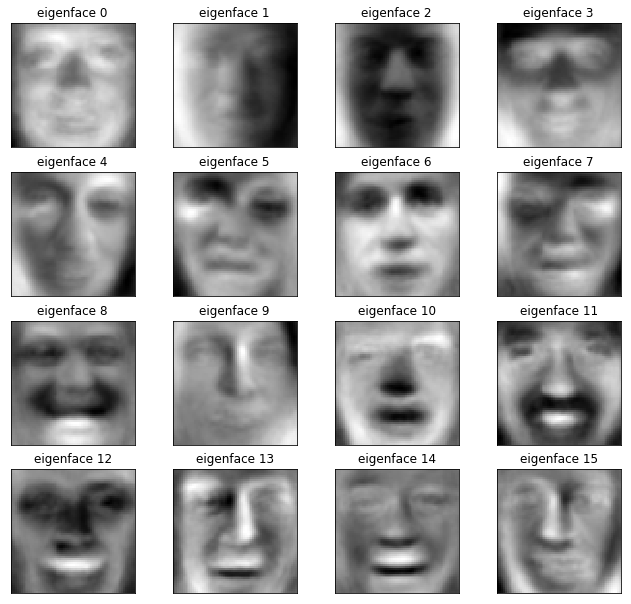

In [34]:
eigenfaces = pca_eig.components_.reshape((50, h, w))
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_portraits(eigenfaces, eigenface_titles, h, w, 4, 4) 